<a href="https://colab.research.google.com/github/mehranommani/Face_Detection/blob/main/Vehicles_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a YOLOv3 Vehicles Detector with Darknet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'  'My Drive'					'yolov3-custom (2).cfg'
 darknet	    Object_D					'yolov3-custom (3).cfg'
 Images		   'Report Seminar.gdoc'			'yolov3-custom (4).cfg'
 Makefile	   'Translated copy of Untitled document.gdoc'	'yolov3-custom (5).cfg'
'Makefile (1)'	    Yolo4					 yolov3-custom.cfg
'Makefile (2)'	   'yolov3-custom (1).cfg'			 yolov9


In [ ]:
%cd /mydrive/darknet

/content/drive/My Drive/darknet


# Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# change makefile to have GPU and OPENCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘buff’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warn

#Download pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict.

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-05-08 10:14:57--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  12.6MB/s    in 18s     

2024-05-08 10:15:15 (13.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

# Step 4: Run Detections with Darknet and YOLOv3!


In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/drive/MyDrive/darknet/data/skateboard.jpg

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

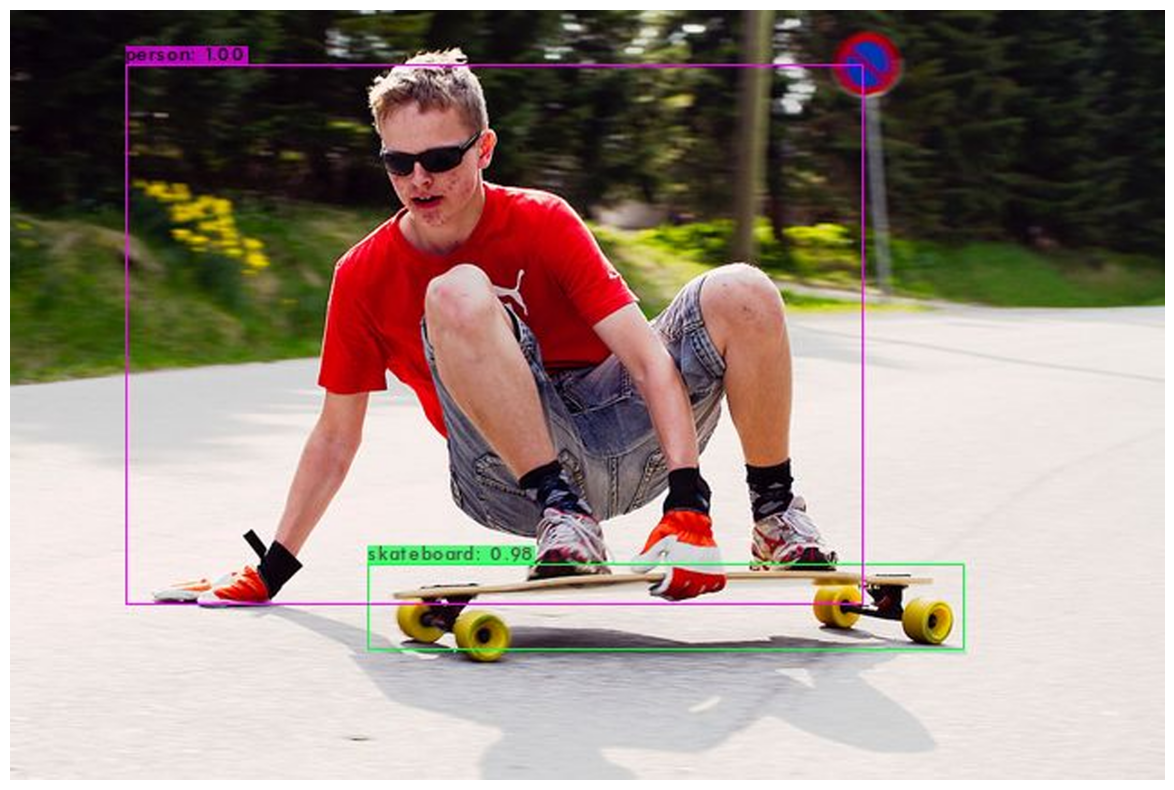

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

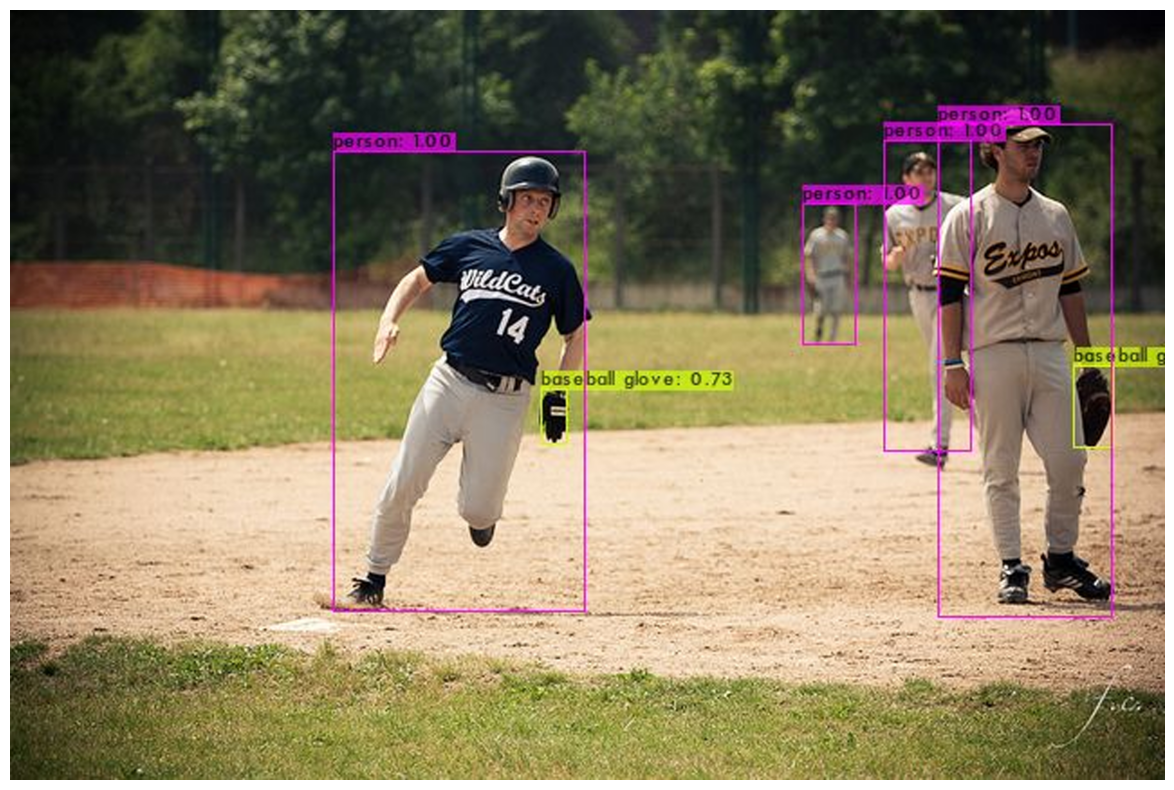

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/drive/MyDrive/darknet/data/baseball.jpg
imShow('predictions.jpg')

In [ ]:
# LOCAL MACHINE DOWNLOAD
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

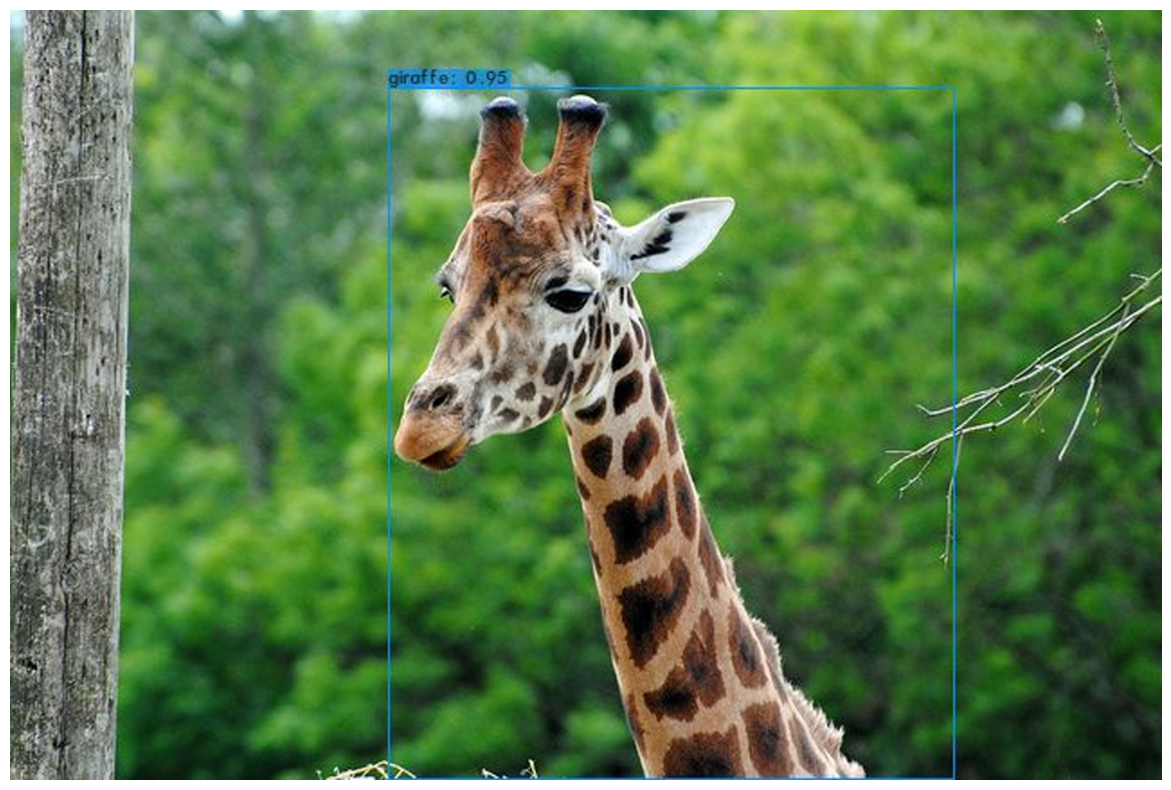

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/drive/MyDrive/darknet/data/giraffe.jpg
imShow('predictions.jpg')

# Training YOLOv3 Vehicles Detector

#Using Google's Open Images Dataset
By using the tools we gathering the data and converting the annotations.

In [ ]:
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git

fatal: destination path 'OIDv4_ToolKit' already exists and is not an empty directory.


In [ ]:
%cd OIDv4_ToolKit

/content/drive/MyDrive/project/darknet/OIDv4_ToolKit


In [ ]:
!pip install awscli --force-reinstall --upgrade

In [ ]:
!python main.py downloader --class Car Van Truck Bus Taxi Bicycle Motorcycle Helmet Traffic_sign Traffic_light --type_csv train --limit 300 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Car', 'Van', 'Truck', 'Bus', 'Taxi', 'Bicycle', 'Motorcycle', 'Helmet', 'Traffic sign', 'Traffic light'] together.

Car
    [INFO] | Downloading train images.
    [INFO] | [INFO] Found 89465 onl

Convert image annotations

In [ ]:
!python convert_annotations.py

Currently in subdirectory: train
Converting annotations for class:  Car_Van_Truck_Bus_Taxi_Bicycle_Motorcycle_Helmet_Traffic sign_Traffic light
100% 2838/2838 [16:20<00:00,  2.89it/s]


#Configuring Files for Training
This step involves properly configuring the custom .cfg file, obj.data, obj.names and train.txt file.


## i) Cfg File
Copy over the yolov3.cfg to edit by running the cell below.

In [ ]:
%cd darknet
!ls

/content/drive/My Drive/project/darknet
3rdparty	darknet			Dockerfile.gpu	       net_cam_v3.sh	scripts
backup		DarknetConfig.cmake.in	generate_train.py      net_cam_v4.sh	src
bad.list	darknet_images.py	image_yolov3.sh        obj		vcpkg.json
build		darknet.py		image_yolov4.sh        OIDv4_ToolKit	vcpkg.json.opencv23
build.ps1	darknet_video.py	include		       package.xml	video_yolov3.sh
cfg		data			json_mjpeg_streams.sh  predictions.jpg	video_yolov4.sh
cmake		docker-compose.yml	LICENSE		       README.md	yolov3.weights
CMakeLists.txt	Dockerfile.cpu		Makefile	       results


In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg /content/drive/MyDrive/project/darknet/cfg/yolov3-custom.cfg

In [ ]:
# to download to local machine (change its name to yolov3-custom.cfg once you download)
download('cfg/yolov3.cfg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now we need to edit the .cfg to fit our needs based on our vehicles detector. Open it up in a code or text editor to do so.

Double clicking on yolov3-custom.cfg and then clicking on the **Open with** drop down and selectin **Text Editor**.

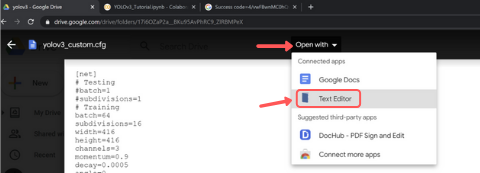

I recommend having **batch = 64** and **subdivisions = 16** for ultimate results. In case of any issues then up subdivisions to 32.

Make the rest of the changes to the cfg based on how many classes you are training your detector on.

**Note:** I set my **max_batches = 20000**, **steps = 16000, 18000**, I changed the **classes = 10** in the three YOLO layers and **filters = 45** in the three convolutional layers before the YOLO layers.

**Optional:** In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /content/drive/MyDrive/project/darknet/cfg/yolov3-custom.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd ..

cp: '/content/drive/MyDrive/project/darknet/cfg/yolov3-custom.cfg' and './cfg/yolov3-custom.cfg' are the same file


## ii) obj.names and obj.data
Create a new file within a code or text editor called **obj.names** and you will make this file exactly the same as your classes.txt in the dataset generation step.

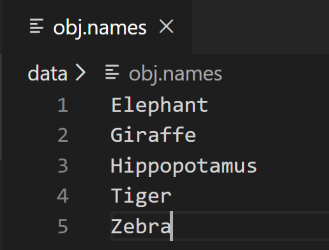

You will also create a **obj.data** file and fill it in like this (change your number of classes accordingly, as well as your backup location)

This backup path is where we will save the weights to of our model throughout training. Create a backup folder in your google drive and put its correct path in this file.

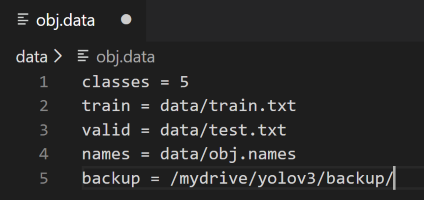



In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/drive/MyDrive/project/darknet/data/obj.names ./data
!cp /content/drive/MyDrive/project/darknet/data/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd ..

## iii) Generating train.txt
The last configuration file needed before we can begin to train our vehicles detector is the train.txt file which hold the relative paths to all our training images.


The script can be accessed from this [Github Repo](https://github.com/theAIGuysCode/YoloGenerateTrainingFile/blob/master/generate_train.py/)

Just download the file to your local machine or Google drive so we can upload it to your cloud VM.

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /content/drive/MyDrive/project/darknet/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


Now we simply run the python script to do all the work for us.

In [ ]:
!python generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree        dog.jpg	    imagenet.labels.list      obj		pedestrians.jpg  train.txt
apartment.jpg  eagle.jpg    imagenet.shortnames.list  obj.data		people.jpg	 voc.names
car.jpg        giraffe.jpg  labels		      objects.jpg	scream.jpg
coco9k.map     goal.txt     lego.jpg		      obj.names		skate.jpg
coco.names     horses.jpg   luggage.jpg		      openimages.names	street.jpg


If everything went as planned double click on **train.txt** on the left side File Explorer and it should look like this.
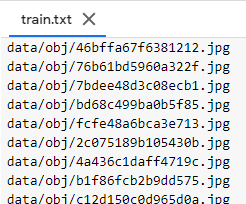

It will contain one line for each training image path.

# Step 4: Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps our vehicles object detector to be way more accurate and not have to train as long. we don't have to use these weights but it will help the modle converge and be accurate way faster.

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2024-05-06 13:02:45--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2024-05-06 13:02:46--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  33.0MB/s    in 5.4s    

2024-05-06 13:02:55 (28.8 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Step 5: Train Vehicles Detector!

In [ ]:
# train vehicles detector
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.417974), count: 3, class_loss = 1.337341, iou_loss = 1.536999, total_loss = 2.874339 
 total_bbox = 169744, rewritten_bbox = 1.298426 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.679727), count: 8, class_loss = 1.958049, iou_loss = 0.794483, total_loss = 2.752532 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.751000), count: 1, class_loss = 0.258919, iou_loss = 0.068720, total_loss = 0.327639 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.580504), count: 9, class_loss = 3.697992, iou_loss = 1.318165, total_loss = 5.016156 
 total_bbox = 169762, rewritten_bbox = 1.298288 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.658850), count: 4, class_loss = 1.382833, iou_loss = 0.441384, total_loss = 1.824217 
v3 (m

If for some reason we got an error or your Colab goes idle during training, we have not lost our weights! Every 100 iterations a weights file called **yolov3_custom_last.weights** is saved to **mydrive/yolov3/backup/** folder (wherever your backup folder is).

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg /content/drive/MyDrive/darknet/backup/yolov3-custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.825941), count: 4, class_loss = 0.055888, iou_loss = 0.122219, total_loss = 0.178107 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.693694), count: 1, class_loss = 0.236017, iou_loss = 0.096052, total_loss = 0.332068 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.003289, iou_loss = 0.000000, total_loss = 0.003289 
 total_bbox = 47342, rewritten_bbox = 1.315956 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.889728), count: 2, class_loss = 0.024356, iou_loss = 0.022837, total_loss = 0.047192 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.890099), count: 4, class_loss = 0.000195, iou_loss = 0.027489, total_loss = 0.027683 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00

# Step 6: Run Vehicles Detector!!!


In [ ]:
# need to set our custom cfg to test mode
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-custom.cfg
%cd ..


/content/drive/MyDrive/darknet/cfg
/content/drive/MyDrive/darknet


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

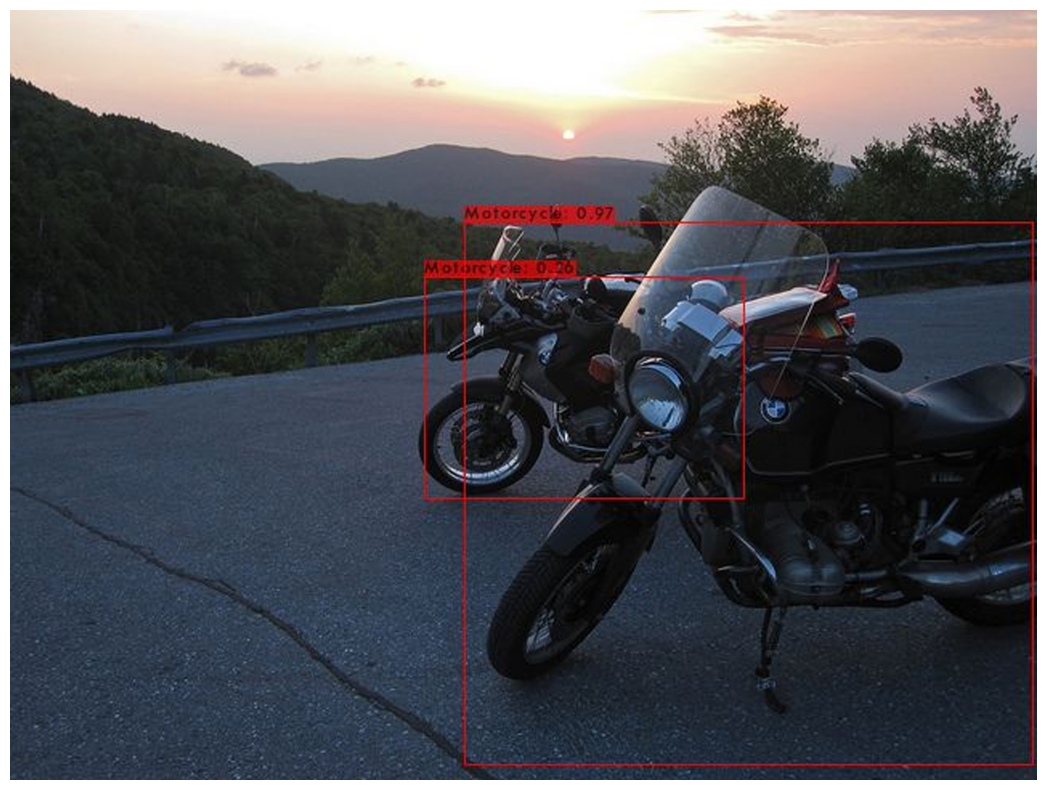

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /content/drive/MyDrive/darknet/backup/yolov3-custom_final.weights /content/drive/MyDrive/darknet/data/motorcycle.jpg -thresh 0.01
imShow('predictions.jpg')

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

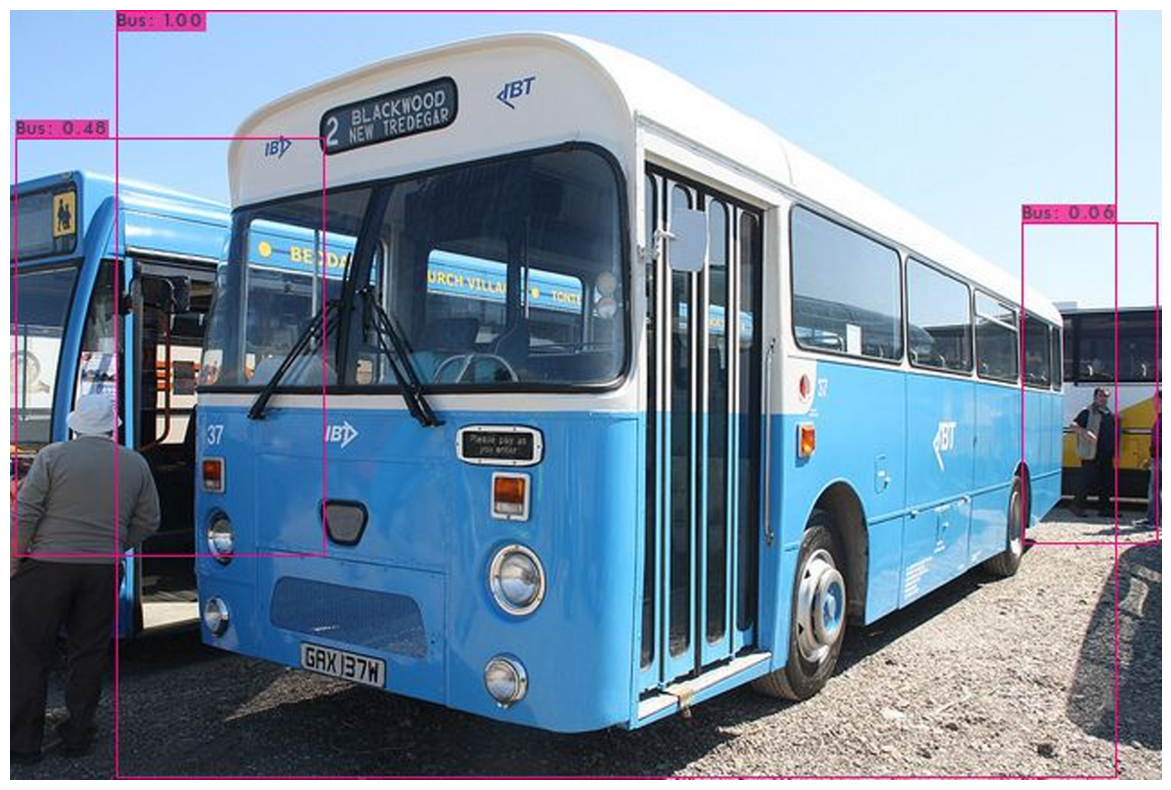

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /content/drive/MyDrive/darknet/backup/yolov3-custom_final.weights /content/drive/MyDrive/darknet/data/bus.jpg -thresh 0.01
imShow('predictions.jpg')